In [1]:
import argparse                                                                                                                                                                                             
import os, sys                                                                                                                                                                                                
                                                                                                                                                                                                            
import matplotlib.pyplot as plt                                                                                                                                                                             
import mplhep as hep   
plt.style.use(hep.style.CMS)

import numpy as np    
import pandas as pd
# from progress.bar import IncrementalBar                                                                                                                                                                     
import yaml                                                                                                                                                                                                 
import json                                                                                                                                                                                                               

In [2]:
sys.path

['/cvmfs/sft.cern.ch/lcg/releases/condor/8.9.11-e1651/x86_64-centos7-gcc11-opt/lib/python3',
 '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/itk',
 '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/python',
 '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib',
 '',
 '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages',
 '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python39.zip',
 '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python3.9',
 '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python3.9/lib-dynload',
 '/eos/user/a/alobanov/.local/lib/python3.9/site-packages',
 '/eos/user/a/alobanov/.local/lib/python3.9/site-packages/python39_omsapi-0.0.0-py3.9.egg',
 '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python3.

In [20]:
fnames = {
    "123x": "/eos/home-a/alobanov/www/L1T/Phase2/menu/rates/test_123x/rates_123.py",
#     "123x Jaana": "/eos/home-a/alobanov/www/L1T/Phase2/menu/rates/jaana_123x/rates_jaana_123x.py",
    "125x": "/eos/home-a/alobanov/www/L1T/Phase2/menu/rates/test_125x/rates_125.py",
}

In [21]:
for i,(key,fname) in enumerate(fnames.items()):
    print(i,key,fname)
    
    sys.path.append(os.path.dirname(fname))
    exec_cmd = "import %s as rates_v%i" %(os.path.basename(fname).replace(".py",""), i)
    print(exec_cmd)
    exec(exec_cmd)
    #rates_v0.offrate["gmtTkMuon"]

0 123x /eos/home-a/alobanov/www/L1T/Phase2/menu/rates/test_123x/rates_123.py
import rates_123 as rates_v0
1 125x /eos/home-a/alobanov/www/L1T/Phase2/menu/rates/test_125x/rates_125.py
import rates_125 as rates_v1


In [22]:
rates_v0.offrate["gmtTkMuon"]

array('d', [28932.5, 28163.2, 3922.6, 364.0, 110.3, 47.7, 26.5, 17.8, 12.0, 8.5, 6.4, 5.4, 4.7, 3.8, 3.5, 3.4, 2.9, 2.4, 2.2, 2.1, 2.0, 2.0, 1.8, 1.7, 1.6, 1.6])

In [23]:
rates_v1.offrate["gmtTkMuon"]

array('d', [17768.8, 16706.8, 1917.1, 326.7, 104.2, 47.5, 24.6, 15.0, 10.8, 7.6, 6.0, 4.5, 3.5, 3.0, 2.8, 2.4, 2.1, 2.1, 1.9, 1.7, 1.5, 1.3, 1.2, 1.2, 0.9, 0.8])

In [24]:
objs = list(rates_v1.offrate.keys())
objs[:3]

['gmtTkMuon', 'gmtMuon', 'gmtMuonEndcap']

In [25]:
labels = {
    'standaloneElectron' : 'calorimeter-only electron',
    'tkElectron' : 'track-matched electron',
    'tkIsoElectron' : 'track-matched + charged iso. electron',
    'tkPhotonIso' : 'charged iso. photon',
    'standaloneMuon' : 'standalone muon',
    'tkMuon' : 'track-matched muon (tkMuon)',
    'tkMuonStub' : 'track-matched muon (tkMuonStub)',
    'trackerJet' : 'tracker jet',
    'caloJet' : 'calo jet',
    'puppiPhase1Jet' : 'histogr. puppi jet',
    'seededConePuppiJet' : 'seeded cone puppi jet',
    'caloJetExt' : 'calo jet ($|\eta|<5$)',
    'puppiPhase1JetExt' : 'histogr. puppi jet ($|\eta|<5$)',
    'seededConePuppiJetExt' : 'seeded cone puppi jet ($|\eta|<5$)',
    'puppiPhase1HT' : 'histogr. puppi jets $H_{T}$',
    'trackerHT' : 'tracker $H_{T}$',
    'caloHT' : 'calo $H_{T}$',
    'puppiPhase1MHT' : 'histogr. puppi jets $\slash{H}_{T}$',
    'trackerMHT' : 'tracker $\slash{H}_{T}$',
    'puppiMET' : 'puppi $\slash{E}_{T}$',
    'trackerMET' : 'tracker $\slash{E}_{T}$',
    'gmtMuon' : 'GMT standalone muon',
    'gmtTkMuon' : 'GMT track-matched muon',
    'CaloTau' : 'calo tau',
    'CaloTauEndcap' : 'calo tau, endcap',
    'CaloTauBarrel' : 'calo tau, barrel',
    'NNPuppiTauLoose' : 'nnPuppi tau (loose WP)',
    'NNPuppiTau2vtxLoose' : 'nnPuppi tau (loose WP, 2vtx)',
}

In [28]:
plots = {
#     0 : ['standaloneElectron'],
    #0: ['standaloneMuonBarrel', 'standaloneMuonOverlap', 'standaloneMuonEndcap']                                                                                                                           
    ##0 : ['gmtMuonBarrel', 'gmtMuonOverlap', 'gmtMuonEndcap'],                                                                                                                                             
#     0 : ['standaloneElectron', 'tkElectron', 'tkIsoElectron', 'tkPhotonIso'],
#     1 : ['trackerJet', 'puppiPhase1Jet', 'seededConePuppiJet', 'caloJet'],
#     #9 : ['trackerJet', 'puppiPhase1Jet', 'seededConePuppiJet'],                                                                                                                                            
#     2 : ['puppiPhase1JetExt', 'seededConePuppiJetExt', 'caloJetExt'],
#     10 : ['puppiPhase1JetExt', 'seededConePuppiJetExt'],
#     3 : ['puppiPhase1HT', 'trackerHT', 'caloHT'],
#     #4 : ['puppiPhase1HT', 'trackerHT'],                                                                                                                                                                    
#     5 : ['puppiPhase1MHT', 'trackerMHT'],                                                                                                                                                                  
#     6 : ['puppiMET', 'trackerMET'], #'trackerMET_FBE'],                                                                                                                                                     
# #     6 : ['trackerMET'],
#     #7 : ['standaloneMuon', 'tkMuon', 'tkMuonStub'],                                                                                                                                                        
    8 : ['gmtMuon', 'gmtTkMuon'],
#     11 : ['CaloTau', 'NNPuppiTauLoose'], #, 'NNPuppiTau2vtxLoose'],                                                                                                                                         
#     12: ['CaloTau','CaloTauBarrel','CaloTauEndcap'],
#     15: ['CaloTau','CaloTauBarrel','CaloTauEndcap','NNPuppiTauLoose']
}


In [26]:
outdir = "/eos/user/a/alobanov/www/L1T/Phase2/menu/rates/123x_vs_125x/online/"
# outdir = "/eos/user/a/alobanov/www/L1T/Phase2/menu/rates/test_123x_mine_vs_jaana/online/"
if not os.path.exists(outdir): os.makedirs(outdir)

['standaloneElectron', 'tkElectron', 'tkIsoElectron', 'tkPhotonIso']


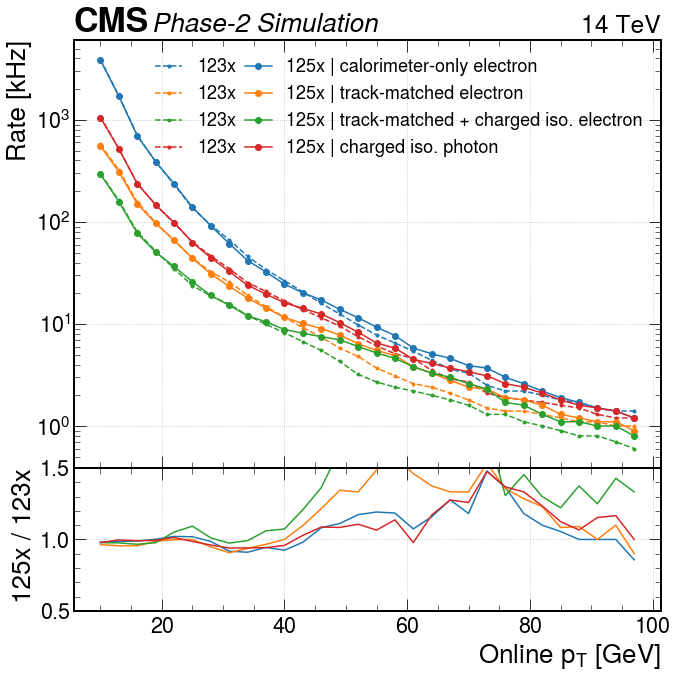

In [27]:
# %%capture

for _,items in plots.items():
    
    fig, axs = plt.subplots(
        2,1,figsize=(10, 10),
        sharex = True,
        gridspec_kw={'height_ratios': [3, 1]})    
    hep.cms.label(ax=axs[0], llabel="Phase-2 Simulation", rlabel = "14 TeV")
    
    print(items)
    
    for item in items:
        if (item not in rates_v0.onl) or (item not in rates_v1.onl): 
            print(f"{item} missing")
            items.remove(item)
    
    ax = axs[0]
        
    # make item labels for legend
#     for item in items:
#         ax.plot([], [], ' ', label = labels[item])
 
    v_labels = ["123x","125x"]
    v_markers = [".--","o-"]
    v_rates = [rates_v0,rates_v1]
    
    for i in range(2):
        label = v_labels[i]
        rates = v_rates[i]
        markers = v_markers[i]
        
#         ax.plot([], [], ' ', label = label)

        for j,item in enumerate(items):
            ax.plot(rates.onl[item],rates.onlrate[item],
                    markers, 
                    color = f"C{j}",
                    label = f"{label}" if i == 0 else fr"{label} | {labels[item]}"
#                     label = f"{label}" if i == 0 else f"{labels[item]}"
            )
           
    # make ratio
    for j,item in enumerate(items):
        ratio = np.array(v_rates[1].onlrate[item]) / np.array(v_rates[0].onlrate[item])
        axs[1].plot(v_rates[0].onl[item], ratio, color = f"C{j}")
            
    ax.legend(ncol = 2, fontsize = "x-small", columnspacing=0.5)
    ax.set_ylabel("Rate [kHz]")
    ax.set_yscale("log")
        
    axs[1].set_xlabel(r"Online $p_T$ [GeV]")
    axs[1].set_ylabel(f"{v_labels[1]} / {v_labels[0]}")
    
#     axs[0].set_ylim(1,1e5)
    axs[1].set_ylim(.5,1.5)

    for ax in axs: ax.grid()
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    
#     for ext in [".png",".pdf"]:
        
#         outfname = outdir + "rates_online_" + "_".join(items) + ext
#         plt.savefig(outfname)
    
#     print(outfname)

    break

# OFFLINE

In [19]:
outdir = "/eos/user/a/alobanov/www/L1T/Phase2/menu/rates/test_123x_vs_125x/offline/"
if not os.path.exists(outdir): os.makedirs(outdir)

In [20]:
%%capture

for _,items in plots.items():
    
    fig, axs = plt.subplots(
        2,1,figsize=(10, 10),
        sharex = True,
        gridspec_kw={'height_ratios': [3, 1]})    
    hep.cms.label(ax=axs[0], llabel="Phase-2 Simulation", rlabel = "14 TeV")
    
    print(items)
    
    for item in items:
        if (item not in rates_v0.off) or (item not in rates_v1.off): 
            print(f"{item} missing")
            items.remove(item)
    
    ax = axs[0]
        
    # make item labels for legend
#     for item in items:
#         ax.plot([], [], ' ', label = labels[item])
 
    v_labels = ["123x","125x"]
    v_markers = [".--","o-"]
    v_rates = [rates_v0,rates_v1]
    
    for i in range(2):
        label = v_labels[i]
        rates = v_rates[i]
        markers = v_markers[i]
        
#         ax.plot([], [], ' ', label = label)

        for j,item in enumerate(items):
            ax.plot(rates.off[item],rates.offrate[item],
                    markers, 
                    color = f"C{j}",
                    label = f"{label}" if i == 0 else fr"{label} | {labels[item]}"
#                     label = f"{label}" if i == 0 else f"{labels[item]}"
            )
           
    # make ratio
    for j,item in enumerate(items):
        ratio = np.array(v_rates[1].offrate[item]) / np.array(v_rates[0].offrate[item])
        axs[1].plot(v_rates[0].off[item], ratio, color = f"C{j}")
            
    ax.legend(ncol = 2, fontsize = "x-small", columnspacing=0.5)
    ax.set_ylabel("Rate [kHz]")
    ax.set_yscale("log")
        
    axs[1].set_xlabel(r"Offline $p_T$ [GeV]")
    axs[1].set_ylabel(f"{v_labels[1]} / {v_labels[0]}")
    
#     axs[0].set_ylim(1,1e5)

    for ax in axs: ax.grid()
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    
    for ext in [".png",".pdf"]:
        
        outfname = outdir + "rates_offline_" + "_".join(items) + ext
        plt.savefig(outfname)
    
    print(outfname)

#     break